In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import moment

from utils import *
from AnalyseDefects import AnalyseDefects
from AnalyseDefectsAll import AnalyseDefectsAll

In [5]:
def gen_analysis_dict(LL, mode):

    dshort = dict(path = f'C:\\Users\\Simon Andersen\\Documents\\Uni\\Speciale\\Hyperuniformity\\nematic_analysis{LL}_LL0.05', \
              suffix = "short", priority = -1, LX = LL, Nframes = 181)
    dlong = dict(path = f'C:\\Users\\Simon Andersen\\Documents\\Uni\\Speciale\\Hyperuniformity\\nematic_analysis{LL}_LL0.05_long', \
                suffix = "long", priority = 0, LX = LL, Nframes = 400)
    dvery_long = dict(path = f'C:\\Users\\Simon Andersen\\Documents\\Uni\\Speciale\\Hyperuniformity\\nematic_analysis{LL}_LL0.05_very_long',\
                    suffix = "very_long", priority = 3, LX = LL, Nframes = 1500)
    dvery_long2 = dict(path = f'C:\\Users\\Simon Andersen\\Documents\\Uni\\Speciale\\Hyperuniformity\\nematic_analysis{LL}_LL0.05_very_long_v2',\
                    suffix = "very_long2", priority = 2, LX = LL, Nframes = 1500)

    if mode == 'all':
        if LL == 2048:
            defect_list = [dshort, dlong]
        else:
            defect_list = [dshort, dlong, dvery_long, dvery_long2] if LL in [256, 512] else [dshort, dlong, dvery_long]
    else:
        defect_list = [dshort]
    
    return defect_list

L = 1024
use_merged = False
N = 0 if use_merged else -1
output_path = f'data\\nematic_analysis{L}_LL0.05'
mode = 'all' # 'all' or 'short'
ad = AnalyseDefects(gen_analysis_dict(L, 'all'), output_path = output_path)
#bind, sus, _ = ad.get_binder_susceptibility(Ndataset = N, use_merged=use_merged)
def_arr = ad.get_arrays_full(Ndataset = N)[0]
def_arr_av, _, _, av_def = ad.get_arrays_av(Ndataset = N, use_merged=use_merged)
act_list_all = ad.act_list[0]
act_list = ad.act_list[N]
conv_list = ad.conv_list[N]

Nexp = 10
def_arr = def_arr[:, :, :Nexp]

In [ ]:
def_arr_merged = np.zeros()

In [3]:
def calc_moments(def_arr, conv_list, center = 0, norm_factor = None):

    Nact, Nexp = def_arr.shape[1], def_arr.shape[-1] 
    print(Nact, Nexp)
    moments = np.zeros((4, Nact))

    normalization = norm_factor if norm_factor is not None else 1
    defects = def_arr / normalization
 
    for i in range(Nact):
        moments[:, i] = [moment(defects[conv_list[i]:,i,:], moment = j + 1, axis = (0,-1), center=center,nan_policy = 'omit') for j in range(4)]
    return moments

In [199]:
#def_var = np.nanvar(def_arr, axis = 1)

center = 0
max_act = 0.026
max_act_idx = act_list_all.index(max_act) #-1 #np.max(act_list)
normalize_by_max = True
norm_factor = av_def[max_act_idx,0] if normalize_by_max else 1
if normalize_by_max:
    def_arr_normed = def_arr / norm_factor
else:
    def_arr_normed = def_arr / av_def[:,0][None, :, None]
act_crit = 0.022
#act_list_reduced 

mom4 = moment(def_arr_normed, moment = 4, axis = (0,-1), center = center, nan_policy = 'omit')
mom3 = moment(def_arr_normed, moment = 3, axis = (0,-1), center = center, nan_policy = 'omit')
mom2 = moment(def_arr_normed, moment = 2, axis = (0,-1), center = center, nan_policy = 'omit')
mom1 = moment(def_arr_normed, moment = 1, axis = (0,-1), center = center, nan_policy = 'omit')

binder = 1 - mom4 / (3 * mom2**2)

In [ ]:
def analyse_sus_binder(Nscale, system_size_list, order_param_func, act_scale=False, Npower = 1, center = None, shift = False, act_to_plot = 0.022):

    for i, LL in enumerate(system_size_list):
        output_path = f'data\\nematic_analysis{LL}_LL0.05'
        mode = 'all' # 'all' or 'short'
        defect_list = gen_analysis_dict(LL, mode)
        ad = AnalyseDefects(defect_list, output_path=output_path)

        for N in range(ad.Ndata):
            av_defects = ad.get_arrays_av(Ndataset = N)[-1]
            def_arr = ad.get_arrays_full(Ndataset = N)[0]
           # order_param = order_param_func(def_arr, av_defects, LX = LL, shift = shift)
   
            ad.calc_binder_susceptibility(order_param_func = order_param_func, Ndataset = N, Nscale=Nscale, save = True)

        ad.merge_sus_binder()

    ada = AnalyseDefectsAll(system_size_list)


0.0018742766828168164
31 2
11 2
2 2


C:\Users\Simon Andersen\AppData\Local\Temp\ipykernel_7912\2068339178.py:42: RuntimeWarning: invalid value encountered in divide
  binder = 1 - moms_all[3,:] / (3 * moms_all[1,:]**2)


8 2
0.0018659855120748447
31 2
11 2
2 2
6 2
0.001853820632175846
30 2
10 2
9 2
0.00185791142079053
22 2
6 2


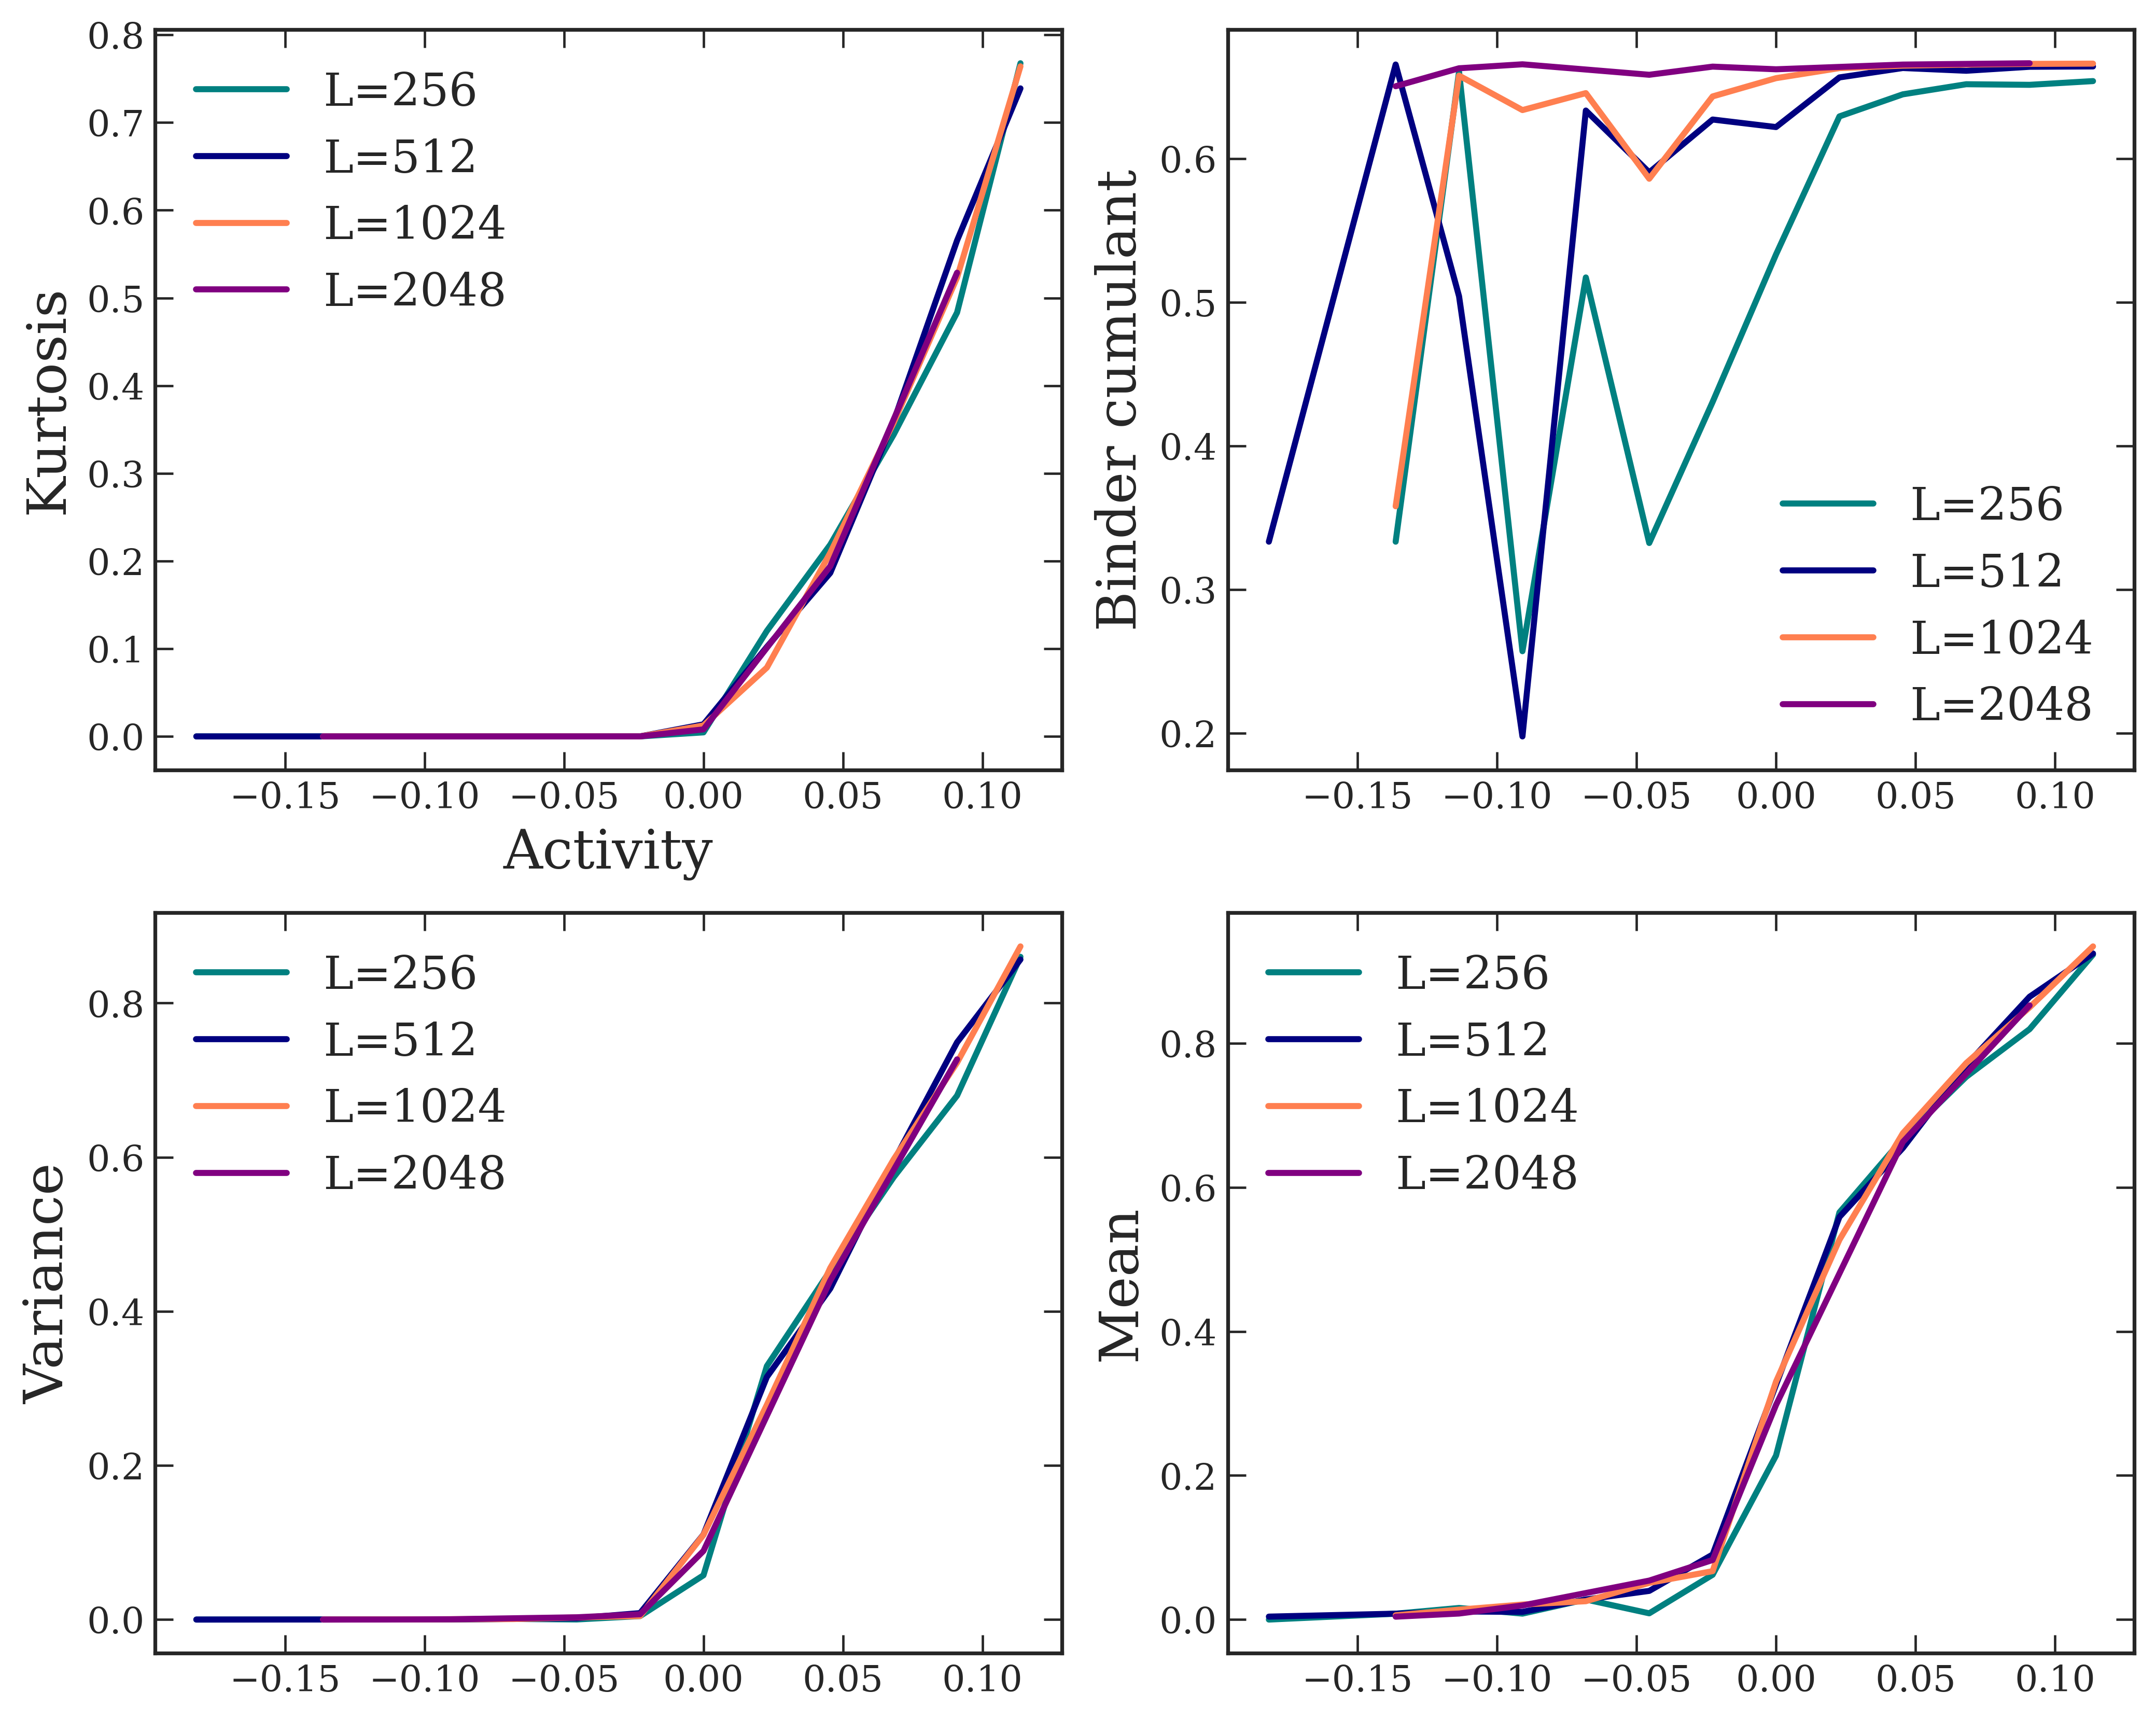

In [217]:
fig, ax = plt.subplots(nrows = 2,ncols=2, figsize = (10,8))
ax = ax.flatten()
L_list = [256, 512, 1024, 2048]
use_merged = True
output_path = f'data\\nematic_analysis{L}_LL0.05'
mode = 'all' # 'all' or 'short'

for L in [256, 512, 1024,2048]: # L_list:
    output_path = f'data\\nematic_analysis{L}_LL0.05'
    ad = AnalyseDefects(gen_analysis_dict(L, 'all'), output_path = output_path)
    #bind, sus, _ = ad.get_binder_susceptibility(Ndataset = N, use_merged=use_merged)
    def_arr = ad.get_arrays_full(Ndataset = N)[0]
    def_arr_av, _, _, av_def = ad.get_arrays_av(Ndataset = N, use_merged=use_merged)
    act_list_all = ad.act_list[0]



    Nexp = 2 # 10 if L < 2048 else 5
    act_list_all = ad.act_list[0]

    moms_all = np.nan*np.zeros((4, len(ad.act_list[0])))
    av_def = ad.get_arrays_av(use_merged=True)[-1]
    center = 0
    max_act = 0.025
    max_act_idx = act_list_all.index(max_act) #-1 #np.max(act_list)
    normalize_by_max = True
    norm_factor = av_def[max_act_idx,0] if normalize_by_max else 1
    print(norm_factor/L**2)
    act_crit = 0.022
    #act_list_reduced 


    for i in range (len(ad.act_list)):
        act_list = ad.act_list[i]

        act_idx_bounds = [act_list_all.index(act_list[0]), act_list_all.index(act_list[0]) + len(act_list)]

        def_arr = ad.get_arrays_full(Ndataset = i)[0][:,:,:Nexp]
        moms_all[:,act_idx_bounds[0]:act_idx_bounds[-1]] = calc_moments(def_arr, ad.conv_list[i], center = center, norm_factor = norm_factor)

        #moms = calc_moments(def_arr, conv_list, center = 0, norm_factor = norm_factor)
        binder = 1 - moms_all[3,:] / (3 * moms_all[1,:]**2)

    X = (np.array(act_list_all[:max_act_idx]) - act_crit) / act_crit
    
    ax[0].plot(X, moms_all[-1,:max_act_idx], label = f'L={L}')
    #ax[1].plot(act_list, mom3, label = '3rd moment')
    ax[1].plot(X, binder[:max_act_idx], label =  f'L={L}')
    ax[2].plot(X, moms_all[1,:max_act_idx], label =  f'L={L}')
    ax[3].plot(X, moms_all[0,:max_act_idx], label =  f'L={L}')
    for axi in ax:
      #  axi.set_xlim([0.018,0.026])
        axi.legend()
    ax[0].set_xlabel('Activity')

    ax[0].set_ylabel('Kurtosis')
    ax[1].set_ylabel('Binder cumulant')
    ax[2].set_ylabel('Variance')
    ax[3].set_ylabel('Mean')
    ax[0].legend()

In [ ]:
fig, ax = plt.subplots(nrows = 2,ncols=2, figsize = (10,8))
ax = ax.flatten()

ax[0].plot(act_list, mom4, label = '4th moment')
#ax[1].plot(act_list, mom3, label = '3rd moment')
ax[1].plot(act_list, binder, label = 'Binder cumulant')
ax[2].plot(act_list, mom2, label = '2nd moment')
ax[3].plot(act_list, mom1, label = '1st moment')

ax[0].set_xlabel('Activity')
ax[0].set_ylabel('Moment')
ax[0].legend()


In [7]:
act_list

(0.019, 0.0195, 0.02, 0.0205, 0.021, 0.0215, 0.022, 0.0225, 0.023)

500 0.019
500 0.0195
500 0.02
500 0.0205
500 0.021
500 0.0215
500 0.022
500 0.0225


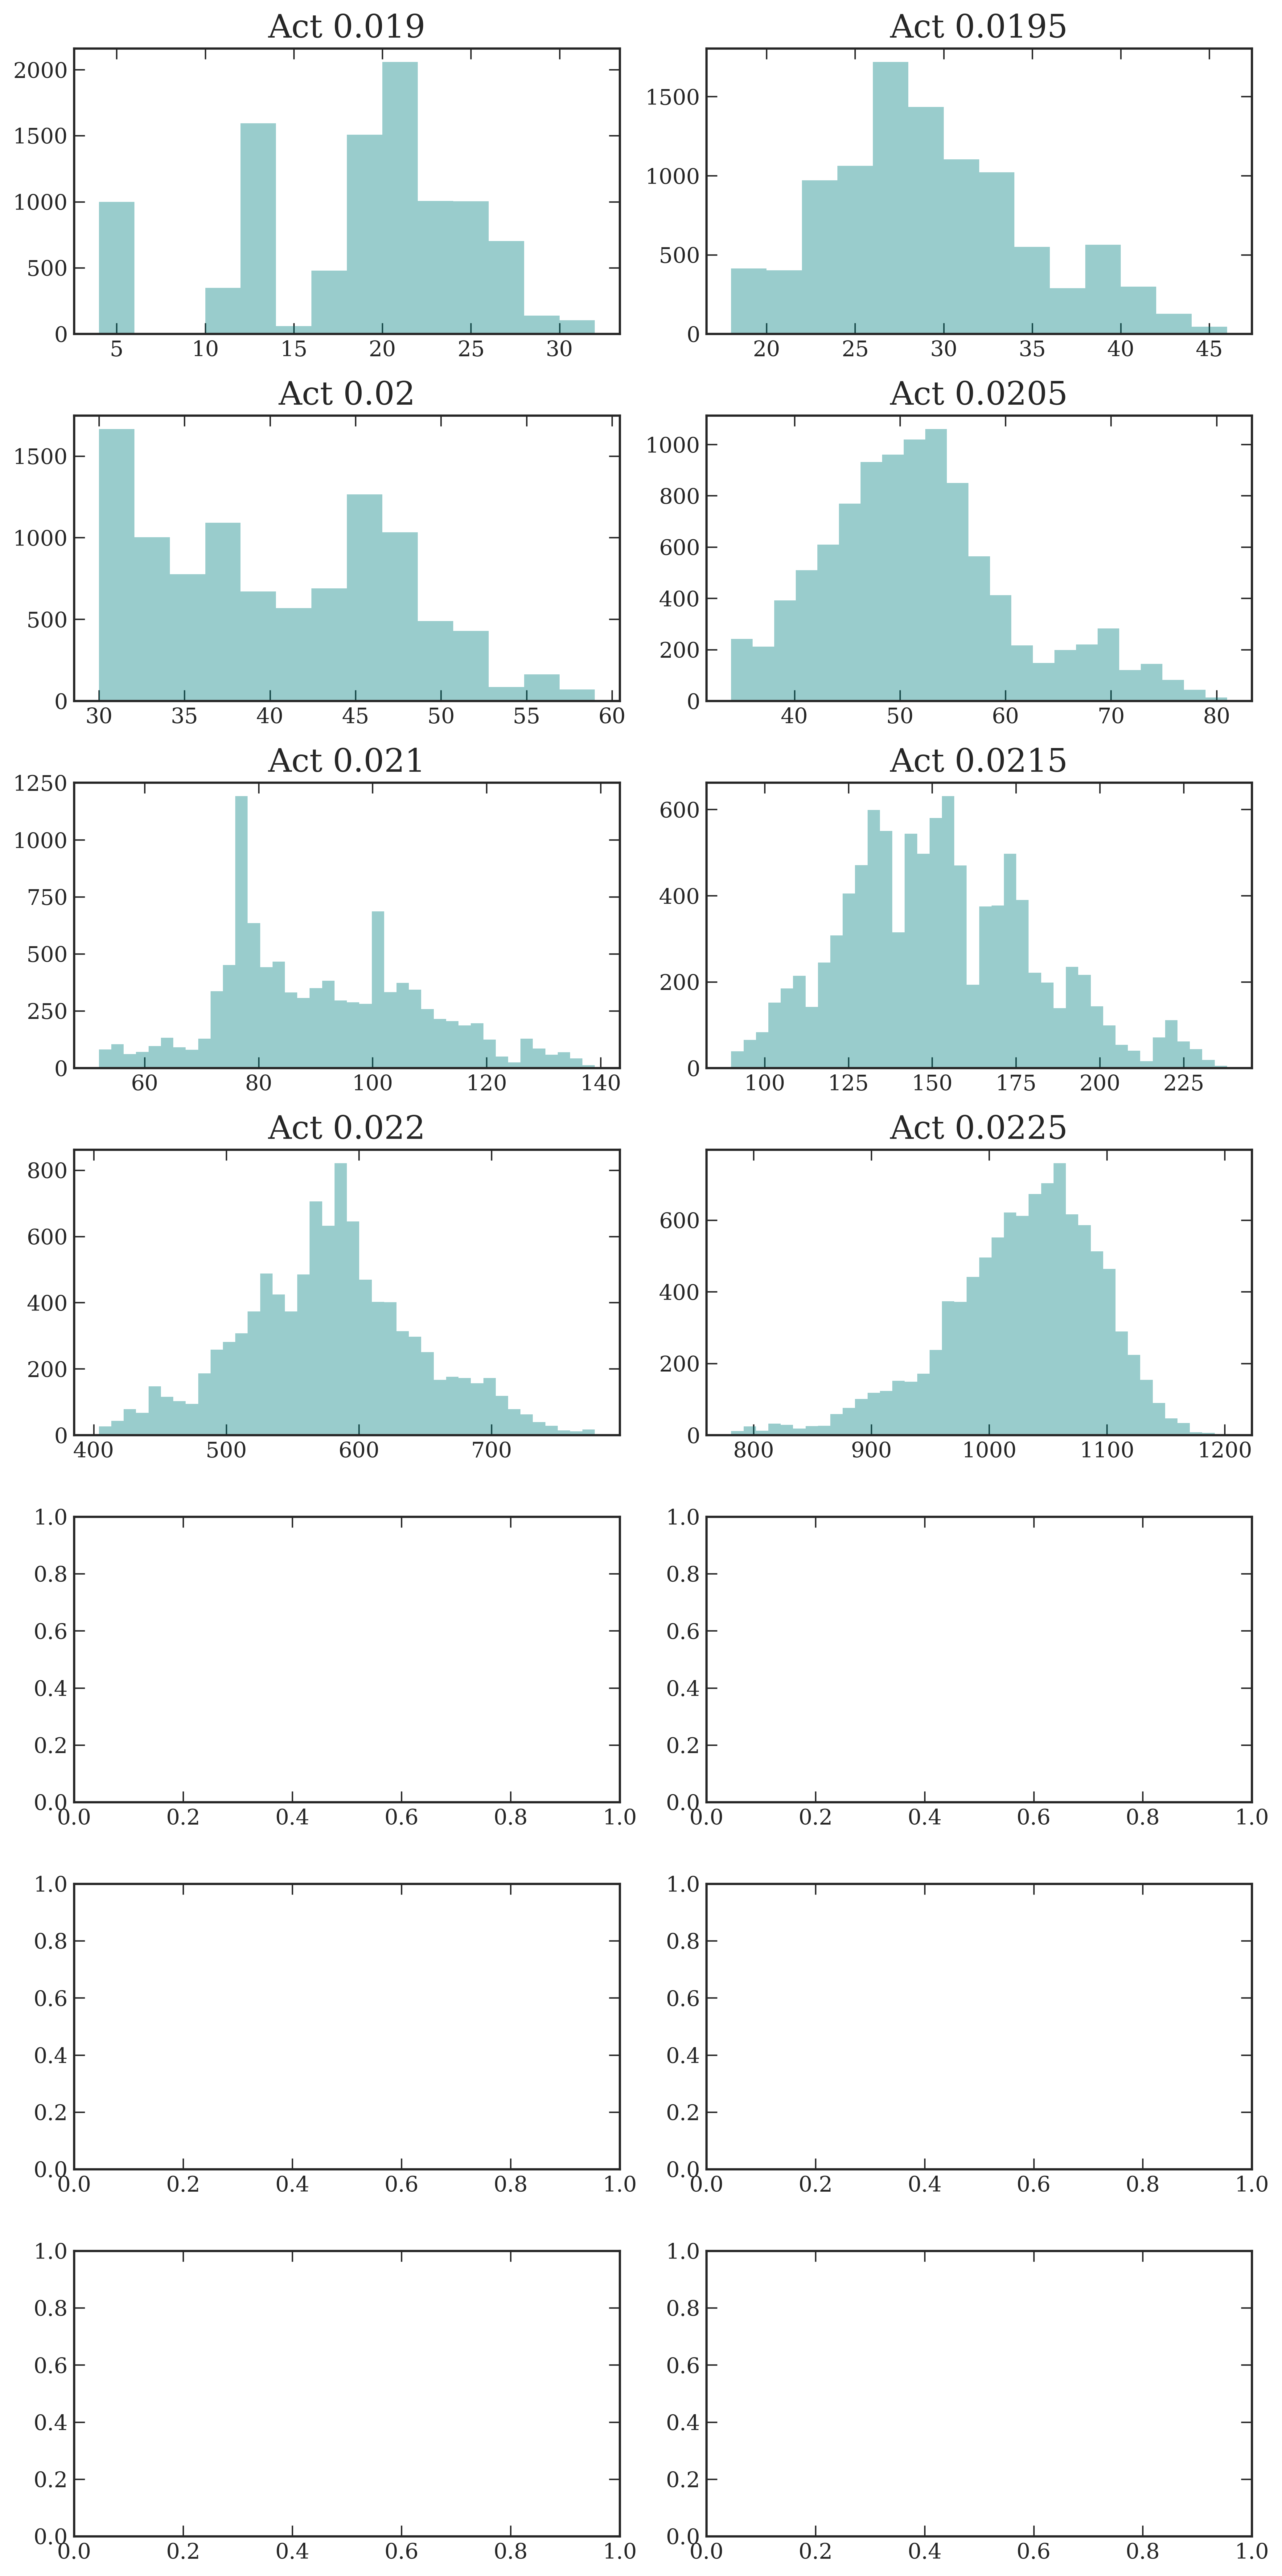

In [10]:
fig, ax = plt.subplots(7, 2, figsize=(10,20))
ax = ax.flatten()

act_min_idx = 0
act_bounds = [act_min_idx, None]
#act_idx = act_list.index(0.0225)
for i, axi in enumerate(ax[0:8]):
    
    act_idx = i + act_min_idx
    ff_idx = 500# conv_list[act_idx]
    print(ff_idx, act_list[act_idx])
    def_arr_flat =  def_arr[ff_idx:, act_idx, :].flatten()
    range = (int(np.nanmin(def_arr_flat)), int(np.nanmax(def_arr_flat)))
    nbins = min(40, int((range[1] - range[0])/2))
    axi.hist(def_arr_flat, range=range, bins=nbins, alpha=.4, histtype='stepfilled', )
    axi.set_title(f'Act {act_list[act_idx]}')

In [ ]:
ad.plot_defects_per_exp(N, [-2,None])
plt.ylim(400,800)
plt.show()

In [ ]:
fig, ax = plt.subplots(4, 2, figsize=(10,20))
ax = ax.flatten()

act_min_idx = 2
act_idx = act_list.index(0.0225)
for i, axi in enumerate(ax[:-1]):
    
    act_idx = i + act_min_idx
    ff_idx = conv_list[act_idx]
    print(ff_idx, act_list[act_idx])
    def_arr_flat = def_arr[ff_idx:, act_idx, :].flatten()
    range = (int(np.nanmin(def_arr_flat)), int(np.nanmax(def_arr_flat)))
    nbins = min(60, range[1] - range[0])
    axi.hist(def_arr_flat, range=range, bins=100, alpha=.4, histtype='stepfilled')
    axi.set_title(f'Act {act_list[act_idx]}')

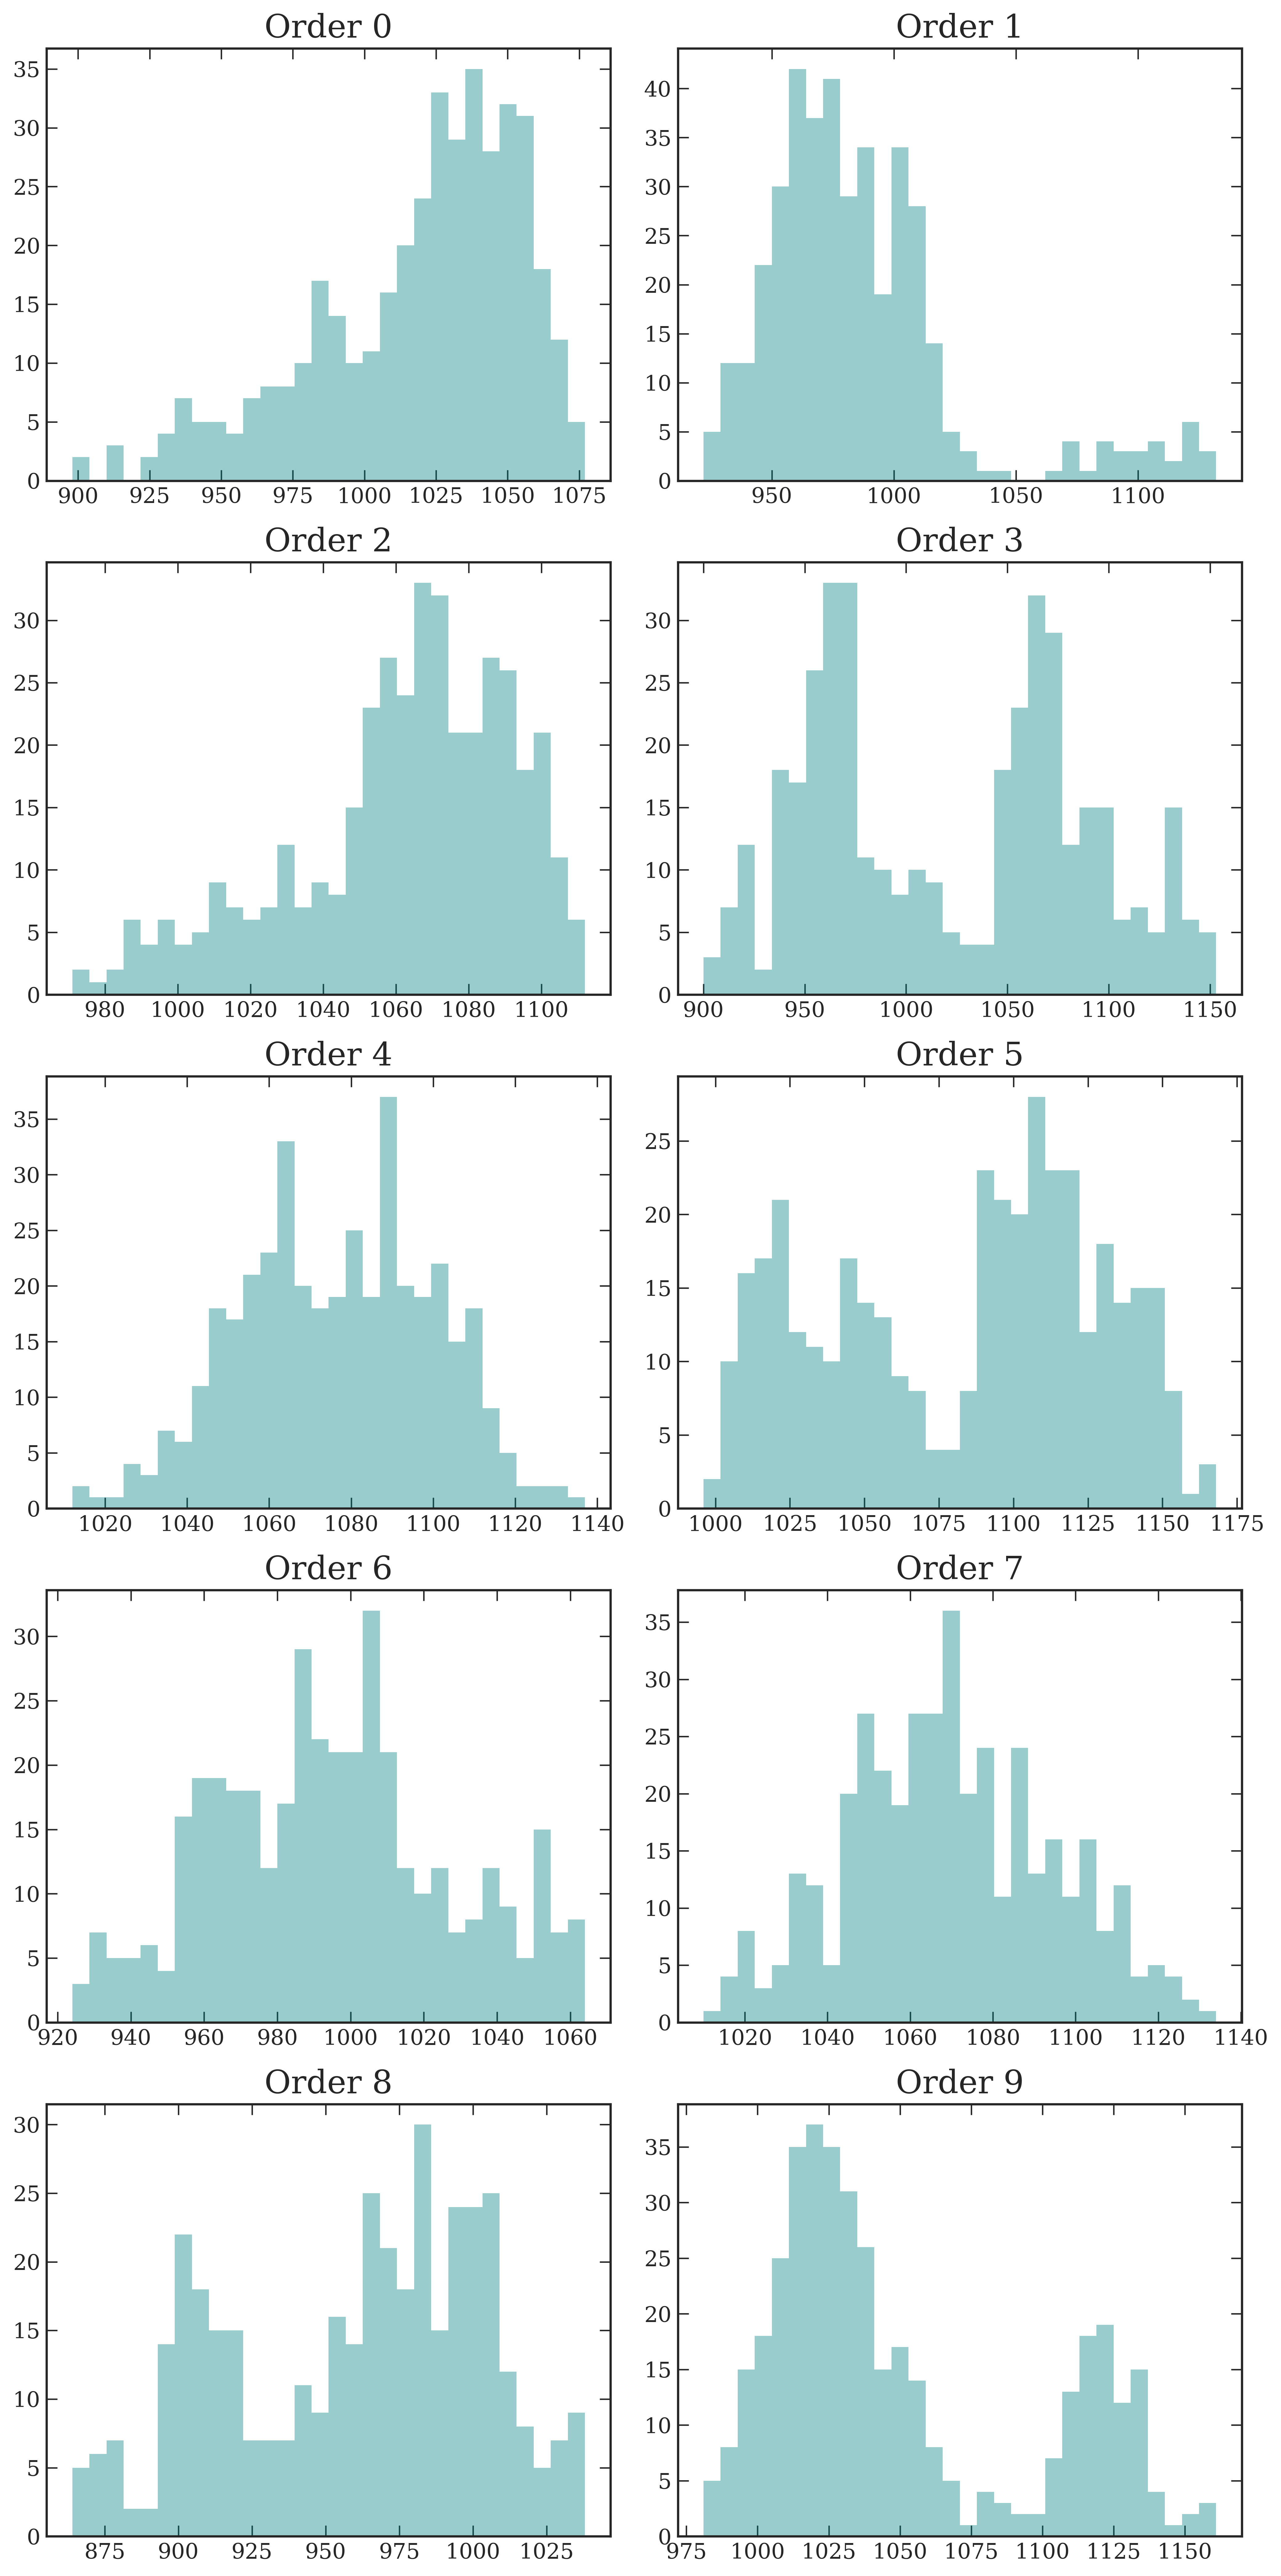

In [42]:

fig, ax = plt.subplots(5, 2, figsize=(10,20))
ax = ax.flatten()

act_idx = act_list.index(0.0225)
for i, axi in enumerate(ax):
    ff_idx = 1100 #conv_list[act_idx]
    range = (int(np.min(def_arr[ff_idx:, act_idx, i])), int(np.max(def_arr[ff_idx:, act_idx, i])))
    axi.hist(def_arr[ff_idx:, act_idx, i].flatten(), range=range, bins=30, alpha=.4, histtype='stepfilled')
    axi.set_title(f'Order {i}')


In [3]:
system_size_list = [256, 512, 1024, 2048]
Nscale = True

In [4]:


def analyse_sus_binder(Nscale, system_size_list, order_param_func, act_scale=False, Npower = 1, center = None, shift = False, act_to_plot = 0.022):

    for i, LL in enumerate(system_size_list):
        output_path = f'data\\nematic_analysis{LL}_LL0.05'
        mode = 'all' # 'all' or 'short'
        defect_list = gen_analysis_dict(LL, mode)
        ad = AnalyseDefects(defect_list, output_path=output_path)

        for N in range(ad.Ndata):
            av_defects = ad.get_arrays_av(Ndataset = N)[-1]
            def_arr = ad.get_arrays_full(Ndataset = N)[0]
           # order_param = order_param_func(def_arr, av_defects, LX = LL, shift = shift)
   
            ad.calc_binder_susceptibility(order_param_func = order_param_func, Ndataset = N, Nscale=Nscale, save = True)

        ad.merge_sus_binder()

    ada = AnalyseDefectsAll(system_size_list)

    fig, ax = plt.subplots(4, 3, figsize = (20, 20))
    ax = ax.flatten()

    for N, act_list in enumerate(ada.act_list):
        binder, sus = ada.get_binder_susceptibility(ada.LX[N])
        order_param_av = np.load(os.path.join(ada.inputs_paths[N],'order_param_av.npy'))

        act_max = 0.022
        act_max_idx = act_list.index(act_max)

        ax[2].plot([ada.LX[N]], sus[act_list.index(act_to_plot)], label = f'act = {act_list[act_list.index(act_to_plot)]}', marker = 'o', color = f'C{N}')

        if act_scale:
            sus = sus / np.array(act_list)
        sus_norm = sus / sus[act_max_idx].max()
            

        reduced_act = (np.array(act_list) - act_max) / act_max
        reduced_act *= system_size_list[N] ** 2

        ax[0].plot(act_list, sus, label = f'LL = {system_size_list[N]}', marker = 'o', color = f'C{N}', alpha=.3)
        ax[1].plot(act_list, binder, label = f'LL = {system_size_list[N]}', marker = 'o', color = f'C{N}', alpha=.3)


        ax[3].plot(act_list, sus_norm, label = f'LL = {system_size_list[N]}', marker = 'o', color = f'C{N}', alpha=.3)


        act_idx_to_plot = act_list.index(act_to_plot)
        ax[4].errorbar(np.arange(order_param_av.shape[0]), order_param_av[:,act_idx_to_plot,0], order_param_av[:,act_idx_to_plot,1],\
                       label = f'LL = {system_size_list[N]}', marker = 'o', color = f'C{N}',  markersize=3,alpha=.3)

        ax[5].plot(act_list, np.nanmean(order_param_av[:,:,0], axis=0),\
                    label = f'LL = {system_size_list[N]}', marker = 'o', color = f'C{N}',  markersize=3,alpha=.3)
        
        for idx, act in enumerate([0.02, 0.021, 0.022, 0.023, 0.03, 0.05]):
            act_idx_many = act_list.index(act)
            ax[6+N].plot(np.arange(order_param_av.shape[0]), order_param_av[:,act_idx_many,0],\
                    label = f'act = {act}', marker = 'o', markersize=3,alpha=.3)
        ax[6+N].set_title(f'LL = {system_size_list[N]}')
        ax[6+N].set_xlabel('Frame')
        ax[6+N].set_ylabel('Order Parameter')
        ax[6+N].legend(fontsize=8)
  
    ax[0].set_xlabel('Activity')
    ax[0].set_ylabel('Susceptibility')
   # ax[0].set_title('Susceptibility v Activity')
    ax[0].legend(fontsize=10)

    ax[1].set_xlabel('Activity')
    ax[1].set_ylabel('Binder Cumulant')
    #ax[1].set_title('Binder Cumulant')
    ax[1].legend(fontsize=10)

    ax[2].set_xlabel('System Size')
    ax[2].set_ylabel('Susceptibility')
    #ax[2].set_title('Susceptibility v System Size')
    ax[2].legend(fontsize=10)

    ax[3].set_xlabel(rf'$\zeta_r L ^2$')
    ax[3].set_ylabel('Susceptibility (normalized)')
    #ax[3].set_title('Susceptibility v Reduced Activity')
    ax[3].legend(fontsize=10)

    ax[4].set_xlabel('Frame')
    ax[4].set_ylabel('Order Parameter')
    #ax[4].set_title('Order Parameter v Frame')
    ax[4].legend(fontsize=10)

    ax[5].set_xlabel('Activity')
    ax[5].set_ylabel('Order Parameter')
    #ax[5].set_title('Order Parameter v Activity')
    ax[5].legend(fontsize=10)
    

    return fig, ax

In [ ]:
Nscale = False
shift = False
center = 0



act = 0.022
ada = AnalyseDefectsAll(system_size_list)
act_list, av_def = ada.get_av_defects(LX = 1024)
av_def_max = av_def[act_list.index(act)][0]

def order_param_func(def_arr, av_defects, LX, shift = False):
    adaa = AnalyseDefectsAll(system_size_list)
    act = 0.022
    act_list, av_def = adaa.get_av_defects(LX = LX)
    av_def_max = av_def[act_list.index(act)][0]
    if shift:

        order_param = def_arr - av_def_max * LX ** 2 #av_defects[:,0][None, :, None]
    else:
        order_param = def_arr 

    A = np.pi * 1.25 ** 2
    #scaling = 5
    rho_max = 0.02
    Nmax = rho_max * LX ** 2
    gamma = .7
    
    order_param /= (gamma * LX)  ** 2
    order_param = (2  * A * order_param) 
   # def_arr_n = (2 * def_arr * LX ** 2 - Nmax) / (Nmax)
  #  order_param = (scaling * 2  * def_arr - rho_max * LX ** 2) / (rho_max * LX ** 2 )

    #order_param /= av_defects[:,0][None, :, None]
  #  order_param *= LX
 #   order_param /= LX ** 2
  #
   # order_param /= av_defects[:,0][None, :, None]
    return order_param
        
fig, ax = analyse_sus_binder(Nscale = Nscale, system_size_list = system_size_list[:], center = center,\
                              order_param_func = order_param_func, shift = shift, act_to_plot = 0.022)

ax[0].set_xlim(0.018, 0.15)
ax[1].set_xlim(.018,.025)
#ax[1].set_ylim(0, 1)
#ax[1].vlines(act, 0, 1, linestyle = '--', color = 'k')
ax[2].set_xscale('log')
ax[2].set_yscale('log')
ax[3].set_xlim(0.018, 0.03)
ax[5].set_xlim(0.016, 0.03)
ax[5].set_ylim(-.01, .05)

ax[5].hlines(0, 0.015, 0.25, linestyle = '--', color = 'k')

In [ ]:
Nscale = False
shift = False
center = 0



act = 0.022
ada = AnalyseDefectsAll(system_size_list)
act_list, av_def = ada.get_av_defects(LX = 1024)
av_def_max = av_def[act_list.index(act)][0]

def order_param_func(def_arr, av_defects, LX, shift = False):
    adaa = AnalyseDefectsAll(system_size_list)
    act = 0.022
    act_list, av_def = adaa.get_av_defects(LX = LX)
    av_def_max = av_def[act_list.index(act)][0]
    if shift:

        order_param = def_arr - av_def_max * LX ** 2 #av_defects[:,0][None, :, None]
    else:
        order_param = def_arr 

    A = np.pi * 1.25 ** 2
    scaling = 1
    rho_max = 0.02
    Nmax = rho_max * LX ** 2
    
 #   order_param = (scaling * 2  * A * def_arr - LX ** 2) / (LX ** 2)
   # def_arr_n = (2 * def_arr * LX ** 2 - Nmax) / (Nmax)
    order_param = (scaling * 2  * def_arr - rho_max * LX ** 2) / (rho_max * LX ** 2 )

    #order_param /= av_defects[:,0][None, :, None]
  #  order_param *= LX
 #   order_param /= LX ** 2
  #
   # order_param /= av_defects[:,0][None, :, None]
    return order_param
        
fig, ax = analyse_sus_binder(Nscale = Nscale, system_size_list = system_size_list[:], center = center,\
                              order_param_func = order_param_func, shift = shift, act_to_plot = 0.020)

ax[0].set_xlim(0.018, 0.2)
ax[1].set_xlim(.018,.2)
#ax[1].set_ylim(0, 1)
#ax[1].vlines(act, 0, 1, linestyle = '--', color = 'k')
ax[2].set_xscale('log')
ax[2].set_yscale('log')
ax[3].set_xlim(0.018, 0.1)
#ax[5].set_xlim(0.019, 0.025)
#ax[5].set_ylim(-30, 2)

ax[5].hlines(0, 0.015, 0.025, linestyle = '--', color = 'k')

In [ ]:
Nscale = False
shift = False
center = 0

act = 0.022
ada = AnalyseDefectsAll(system_size_list)
act_list, av_def = ada.get_av_defects(LX = 1024)
av_def_max = av_def[act_list.index(act)][0]

def order_param_func(def_arr, av_defects, LX, shift = shift):
    adaa = AnalyseDefectsAll(system_size_list)
    act = 0.022
    act_list, av_def = adaa.get_av_defects(LX = LX)
    av_def_max = av_def[act_list.index(act)][0]
    if shift:

        order_param = def_arr - av_def_max * LX ** 2 #av_defects[:,0][None, :, None]
    else:
        order_param = def_arr 

    #order_param /= LX
 #   for i, act in enumerate(act_list):
  #      order_param[:,i,:] /= act 
    order_param /= np.sqrt(av_defects[:,0][None, :, None])
    #act_list = np.array(act_list)
   # order_param /= act_list[:][None,:,None]
    return order_param

fig, ax = analyse_sus_binder(Nscale = Nscale, act_scale=False, system_size_list = system_size_list[:], center = center,\
                              order_param_func = order_param_func, shift = shift, act_to_plot = 0.05)

ax[0].set_xlim(0.018, 0.08)
#ax[0].set_ylim(0, 0.1)
#ax[0].hlines(0.66, 0.018, 0.1, linestyle = '--', color = 'k')
ax[1].set_xlim(.018,.03)
ax[1].vlines(act, 0, 1, linestyle = '--', color = 'k')
ax[2].set_xscale('log')
ax[2].set_yscale('log')
ax[3].set_xlim(0.018, 0.2)
#ax[5].set_xlim(0.019, 0.025)
#ax[5].set_ylim(-30, 2)

ax[5].hlines(0, 0.015, 0.025, linestyle = '--', color = 'k') 


In [70]:
act_list, av_def = ada.get_av_defects(LX = 1024)

In [ ]:
Nscale = True
shift = True
center = 0

act = 0.022
ada = AnalyseDefectsAll(system_size_list)
act_list, av_def = ada.get_av_defects(LX = 1024)
av_def_max = av_def[act_list.index(act)][0]

def order_param_func(def_arr, av_defects, LX, shift = False):
    adaa = AnalyseDefectsAll(system_size_list)
    act = 0.022
    act_list, av_def = adaa.get_av_defects(LX = LX)
    av_def_max = av_def[act_list.index(act)][0]
    if shift:

        order_param = def_arr - av_defects[:,0][None, :, None] # av_def_max * LX ** 2 #av_defects[:,0][None, :, None]
    else:
        order_param = def_arr 

    order_param /= av_defects[:,0][None, :, None]
  #  order_param *= LX
   # order_param /= LX 
  #  order_param /= av_defects[:,0][None, :, None]
 #   order_param = (def_arr - av_def_max * LX ** 2) / av_defects[:,0][None, :, None] # / (av_def_max * LX ** 2)
    return order_param
        
fig, ax = analyse_sus_binder(Nscale = Nscale, system_size_list = system_size_list[:], center = center,\
                              order_param_func = order_param_func, shift = shift, act_to_plot = 0.022)

ax[0].set_xlim(0.016, 0.03)
ax[1].set_xlim(.016,.03)
ax[1].vlines(act, 0, 1, linestyle = '--', color = 'k')
ax[2].set_xscale('log')
ax[2].set_yscale('log')
ax[3].set_xlim(-.2e6,.2e6)
ax[5].set_xlim(0.015, 0.03)
ax[5].set_ylim(-30, 5)

ax[5].hlines(0, 0.015, 0.025, linestyle = '--', color = 'k')

In [ ]:
fig, ax = plt.subplots(ncols=3, figsize=(15, 5))
ax = ax.flatten()
center = 0
for j, L in enumerate(system_size_list[:-1]):

    N = -1

    #ada = AnalyseDefectsAll(system_size_list)
    #bind, sus = ada.get_binder_susceptibility(LX = L)

    output_path = f'data\\nematic_analysis{L}_LL0.05'
    ad = AnalyseDefects(gen_analysis_dict(L, 'all'), output_path = output_path)
    bind, sus, _ = ad.get_binder_susceptibility(Ndataset = N)
    def_arr = ad.get_arrays_full(Ndataset = N)[0]
    def_arr_av, _, _, av_def = ad.get_arrays_av(Ndataset = N, use_merged=False)
    act_list = ad.act_list[N]
    conv_list = ad.conv_list[N]

    Nexp = 3
    Nexp_bounds = [6,7]
    rho_max = av_def[act_list.index(0.022)][0]

    #Njump = np.arange(0,1499, 20)
    def_arr = (def_arr[:,:,Nexp_bounds[0]:Nexp_bounds[1]] )
    #def_arr = (def_arr[Njump,:,:Nexp] )

    order_param = def_arr / L #/ av_def[act_list.index(0.022),0]
    #order_param =  def_arr /  av_def[:,0][None, :, None]  

    order_param = order_param ** 3

    #order_param = (def_arr - ndef_max)  / av_def[:,0][None, :, None]  
    A = np.pi * 1.25 ** 2
    scaling = 1
    rho_max = 0.01
    #order_param = (2  * A * def_arr / L ** 2 - 1) # / L ** 2
   # order_param = (2  * def_arr - rho_max) / rho_max 
   # order_param = (def_arr  - av_def[:,0][None, :, None]) / L
    #order_param = (def_arr  - def_arr_av[:, :, None]) / L**2

    
   # conv_list = [0] * len(act_list)
    moms = generate_moments(order_param, L, conv_list)
    sigmas = []
    mfour = []
    binders = []
    sigmas2 = []
    mfour2 = []
    binders2 = []
    

    for i, act in enumerate(act_list):
        ff = 0
        mom4 = moment(order_param[ff:, i, :], moment = 4, axis = None, center = center, nan_policy = 'omit')
        mom2 = moment(order_param[ff:, i, :], moment = 2, axis = None, center = center, nan_policy = 'omit')
        mom1 = moment(order_param[ff:, i, :], moment = 1, axis = None, center = center, nan_policy = 'omit')
        
        gauss_vals = stats.norm.rvs(size=5_000, loc=mom1, scale=mom2)
        gm4 = moment(gauss_vals, moment = 4, axis = None, center = center, nan_policy = 'omit')
        gm2 = moment(gauss_vals, moment = 2, axis = None, center = center, nan_policy = 'omit')

        sigmas2.append(moms[1,i])
        mfour2.append(moms[3,i])
        binders2.append(1 - gm4 / (3 * gm2 ** 2))
        binder = 1 - np.nanmean((order_param[conv_list[i]:, i, :])**4) \
                / (3 * np.nanmean((order_param[conv_list[i]:, i, :])**2) ** 2)

        mfour.append(mom4)
        sigmas.append(mom2**2)
        # binders.append(binder)
        binders.append(1 - mom4 / (3 * mom2 ** 2))

    ax[0].plot(act_list, sigmas, 'o-', label = f'L = {L}' , alpha=.5, color= f'C{i}')
 #   ax[0].plot(act_list, sigmas2, 's-', label = f'L = {L}' , alpha=.5, color= f'C{i}')
    ax[1].plot(act_list, mfour, 'o-', alpha=.5, color= f'C{i}')# label = f'L = {L}')
 #   ax[1].plot(act_list, mfour2, 's-', alpha=.5, color= f'C{i}')# label = f'L = {L}')
    ax[2].plot(act_list, binders,'o-', alpha=.5, color= f'C{i}')# label = f'L = {L}')
  #  ax[2].plot(act_list, binders2,'s-', alpha=.5, color= f'C{i}')# label = f'L = {L}')

for i, a in enumerate(ax):
    a.set_xlabel('Activity')
    a.set_xlim(0.018,0.024)
    
    if i < 2:
        pass
      #  a.set_xlim(0.018,0.0235)
      #  a.set_yscale('log')

      #  a.set_ylim(bottom = 0, top = .4e-9)

  #  a.legend() 
ax[0].set_ylabel('Variance')

ax[1].set_ylabel('Fourth Moment')
ax[2].set_ylabel('Binder Cumulant')
fig.legend(ncol=3 , loc = 'upper center', bbox_to_anchor = (0.5, 1.055))


In [120]:
L = 1024
use_merged = True
N = 0 if use_merged else -1
ad = AnalyseDefects(gen_analysis_dict(L, 'all'), output_path = output_path)
#bind, sus, _ = ad.get_binder_susceptibility(Ndataset = N, use_merged=use_merged)
def_arr = ad.get_arrays_full(Ndataset = N)[0]
def_arr_av, _, _, av_def = ad.get_arrays_av(Ndataset = N, use_merged=use_merged )
act_list = ad.act_list[N]
conv_list = ad.conv_list[N]

In [ ]:
std_list = []
av_list = []
for i, act in enumerate(act_list):
    av_list.append(np.nanmean(def_arr[conv_list[i]:,i,:]))
    std_list.append(np.nanstd(def_arr[conv_list[i]:,i,:]))
    print(act, av_list [i], f'{std_list[i]:.2e}', av_def[i,0], av_def[i,1])

In [ ]:
def_arr /= L **2
std_list = []
av_list = []
ff = 1100
print(L)
for i, act in enumerate(act_list):
    av_list.append(np.nanmean(def_arr[ff:,i,:]))
    std_list.append(np.nanstd(def_arr[ff:,i,:]))
    print(act, av_list [i], f'{std_list[i]:.2e}')

In [ ]:
def_arr /= L **2
std_list = []
av_list = []
ff = 1100
print(L)
for i, act in enumerate(act_list):
    av_list.append(np.nanmean(def_arr[ff:,i,:]))
    std_list.append(np.nanstd(def_arr[ff:,i,:]))
    print(act, av_list [i], std_list[i])

In [ ]:
def_arr /= L **2
std_list = []
av_list = []
ff = 1100
print(L)
for i, act in enumerate(act_list):
    av_list.append(np.nanmean(def_arr[ff:,i,:]))
    std_list.append(np.nanstd(def_arr[ff:,i,:]))
    print(act, av_list [i], std_list[i])

In [ ]:
std_list = []
ff = 1100
print(L)
for i, act in enumerate(act_list):
    std_list.append(np.nanstd(def_arr[ff:,i,:]))
    print(act, std_list[i])

In [ ]:
from scipy import stats

fig, ax = plt.subplots(nrows = 2, ncols=3, figsize=(15, 10))
ax = ax.flatten()

act = 0.023
av_def_max = av_def[act_list.index(act)][0]


ff = 0
Nexp = 10
center = 0 # av_def[0,0]  #0#  av_def_max / L ** 2

A = np.pi * 1.25 ** 2

rho_max = 0.02
Nmax = rho_max * L ** 2
gamma = .3



order_param = (def_arr_av[:,:,0]) #/(av_def[-1,0])

#order_param = (def_arr[:,:,:Nexp] ).astype('float')


#order_param /= (gamma * L)  ** 2
#order_param = (2  * A * order_param) 
#order_param /= np.array(act_list)[None, :, None]

#gauss_vals = stats.norm.rvs(size=50_000, loc=mean, scale=sigma)
bind_list = []
cum_list = []
cumvar_list = []
cumkurt_list = []
var_list = []
kurt_list = []
bind_unb = []
gauss_vals_list = []

for i, act in enumerate(act_list):
    ff = conv_list[i]
    
    mean = np.nanmean(order_param[ff:,i])
    std = np.nanstd(order_param[ff:,i]) * 400 #* np.sqrt(1500)
   # mean = av_def[i,0]
   # std = av_def[i,1] * np.sqrt(15_000) * 10
    Np = 300_000
    gauss_vals = stats.norm.rvs(size=Np, loc=mean, scale=std)

    mom4 = moment(gauss_vals, moment = 4, axis = None, center = center, nan_policy = 'omit')
    mom2 = moment(gauss_vals, moment = 2, axis = None, center = center, nan_policy = 'omit')
    
    gauss_vals_list.append(gauss_vals.mean())

    momcum2 = mom2 # np.var(gauss_vals)
    momcum4 = np.mean((gauss_vals) ** 4) - 3 * (momcum2) ** 2
    momcum4 = mom4 - 3 * (momcum2) ** 2


   # bind_unbiased = (Np-1) / ((Np-2)*(Np-3)) *((Np + 1) * mom4 / mom2 **2 - 3 * (Np - 1))
    bind_unbiased = mom4 / mom2 ** 2 
    bind_unb.append(bind_unbiased/3 -1)
    
   # moms = generate_moments(gauss_vals, L, conv_list[i])
    cum_list.append(1 - momcum4 / (3 * momcum2 ** 2))
    cumvar_list.append(momcum2 ** 2 )#/ std ** 4)
    cumkurt_list.append(momcum4)
    
    bind_list.append( 1 - mom4 / (3 * mom2 ** 2))
    var_list.append(mom2 ** 2 )#/ std ** 4)
    kurt_list.append(mom4 )

acts = (np.array(act_list) - 0.022) / 0.022 * L ** 2
acts = act_list
ax[0].plot(acts, var_list, 'o-', alpha=.5, color= 'b')
ax[0].plot(acts, cumvar_list, 's-', alpha=.5, color= 'r')# label = f'L = {L}')
ax[1].plot(acts, kurt_list, 'o-', alpha=.5, color= f'b')
ax[1].plot(acts, cumkurt_list, 's-', alpha=.5, color= 'r')# label = f'L = {L}')
ax[2].plot(acts, bind_list, 'o-', alpha=.5, color= f'b')# label = f'L = {L}')
#ax[2].plot(act_list, cum_list, 's-', alpha=.5, color= 'r')# label = f'L = {L}')
#ax[2].plot(act_list, bind_unb, 's-', alpha=.5, color= 'g')# label = f'L = {L}')
ax[3].plot(acts, gauss_vals_list, 'o-', alpha=.5, color= f'b')# label = f'L = {L}')
ax[2].set_xlim(0.016,0.034)

In [ ]:
for i, act in enumerate(act_list):
    print(act, np.nanmean(order_param[:,i,:]))

In [ ]:

binder2 = np.zeros_like(bind)
binder1 = np.zeros_like(bind)
binder0 = np.zeros_like(bind)
center = 0
conv_list = [0] * len(act_list)
ndef_max = av_def[act_list.index(0.022)][0]

order_param = (def_arr) / av_def[:,0][None, :, None] #/ L**2  #/ av_def[:,0][None, :, None]   #/ L**2

#order_param = (def_arr - ndef_max)  / av_def[:,0][None, :, None]  
A = np.pi * 1.25 ** 2
scaling = 1
rho_max = 0.01
#order_param = (2  * A * def_arr - L ** 2) / L ** 2
#order_param = (def_arr  - av_def[:,0][None, :, None]) / L**2
#order_param = (def_arr  - def_arr_av[:, :, None]) / L**2




#
moms = generate_moments(order_param, L, conv_list)

for i, act in enumerate(act_list):
        binder0[i] = 1 - moms[3, i] / (3 * moms[1, i] ** 2)

        mom4 = moment(order_param[conv_list[i]:, i, :], moment = 4, axis = None, center = center, nan_policy = 'omit')
        mom2 = moment(order_param[conv_list[i]:, i, :], moment = 2, axis = None, center = center, nan_policy = 'omit')
        binder1[i] = 1 - mom4 / (3 * mom2 ** 2)
        binder2[i] = 1 - np.nanmean((order_param[conv_list[i]:, i, :])**4) \
                    / (3 * np.nanmean((order_param[conv_list[i]:, i, :])**2) ** 2)
   #    print(act, binder2[i], bind[i])
fig, ax = plt.subplots()
ax.plot(act_list, binder1, 's-', label = 'binder orig c1')
ax.plot(act_list, binder2, 'x-', label = 'binder orig c2')
ax.plot(act_list, bind, 'o', alpha=.4, label = 'binder shift')
ax.plot(act_list, binder0, 'x-', label = 'mom0')
ax.hlines(0, 0.015, 0.025, linestyle = '--', color = 'k')
ax.set_xlim(left = 0.018, right = 0.028)
ax.legend(loc = 'lower left')


In [ ]:

binder2 = np.zeros_like(bind)
binder0 = np.zeros_like(bind)
center = 0
#conv_list = [1100] * len(act_list)

conv_list = ad.conv_list[N]
#conv_list[-1] = 350
#conv_list[-2] = 1100
#conv_list[-3] = 1100
#conv_list[-4] = 0
#conv_list = [1000] * l
# en(act_list)
#conv_list = [1100] * len(act_list)


A = np.pi * 1.25 ** 2
scaling = 1
rho_max = 0.01
##order_param = (2  * A * def_arr - L ** 2) / L ** 2
order_param = (def_arr  - av_def[:,0][None, :, None]) / L**2
order_param = (def_arr  - def_arr_av[:, :, None]) / L**2

#moms = generate_moments((def_arr / av_def[:,0][None, :, None]), L, conv_list)
moms = generate_moments(order_param, L, conv_list)

for i, act in enumerate(act_list):

        binder0[i] = 1 - moms[3, i] / (3 * moms[1, i] ** 2)

        mom4 = moment(order_param[conv_list[i]:, i, :], moment = 4, axis = None, center = center, nan_policy = 'omit')
        mom2 = moment(order_param[conv_list[i]:, i, :], moment = 2, axis = None, center = center, nan_policy = 'omit')
        binder2[i] = 1 - mom4 / (3 * mom2 ** 2)
       
fig, ax = plt.subplots()
ax.plot(act_list, binder2, 'x', label = 'moment')
ax.plot(act_list, bind, 'o', alpha=.4, label = 'binder og')
ax.plot(act_list, binder0, 'x', label = 'mom0')
ax.set_xlim(0.01,0.03)
ax.legend()


In [ ]:
Nscale = False
shift = False
Npower = 1

def order_param_func(def_arr, av_defects, LX, shift = False):
    if shift:
        order_param = def_arr - av_defects[:,0][None, :, None]
    else:
        order_param = def_arr 

    order_param /= av_defects[:,0][None, :, None]
   # order_param *= LX
   # order_param = (2  * A * def_arr - LX ** 2) / LX ** 2
    return order_param
        
fig, ax = analyse_sus_binder(Nscale = Nscale, system_size_list = system_size_list, \
                            order_param_func = order_param_func, Npower = Npower, shift = shift, normalize_sus = True)

ax[0].set_xlim(0.016, 0.1)
ax[1].set_xlim(0.016, 0.03)
ax[2].set_xscale('log')
ax[2].set_yscale('log')

In [ ]:
# deff arrs: dens, dens norm [per frame + tot], 
# order ps: clean, shifted by mean, area 
# sus via dens fluc or 2 kinds of var
# full vs tav
N = 2

def_arr, _, dens_fluc_full, av_counts = ad.get_arrays_full(Ndataset = N)
av_def = ad.get_arrays_av(Ndataset = N)[-1]
def_arr_av = ad.get_arrays_av(Ndataset = N)[0]
dens_fluc = dens_fluc_full * (def_arr[:, None, :, :] / LL ** 2) ** 2

act_list = ad.act_list[N]
conv_list = ad.conv_list[N]

#conv_list = [1100] * len(conv_list)

def_arr /= LL ** 2
def_arr_av /= LL ** 2
av_def /= LL ** 2

def_arr_normf = def_arr / def_arr_av [:, :, None]
def_arr_normt = def_arr / av_def[:,0][None, :, None]

#def_arr_shiftf = (def_arr - def_arr_av[:, :, None]) / def_arr_av [:, :, None]
#def_arr_shiftt = (def_arr - av_def[:,0][None, :, None]) / av_def[:,0][None, :, None]

dens_fluc = dens_fluc /  av_def[:,0][None, None, :, None] ** 2
av_counts = av_counts / LL ** 2
av_counts = av_counts #/ av_def[:,0][None, None, :, None]

wmin = 0
fmin = 0
sus_ft = np.nanmean(dens_fluc[fmin:,wmin:,:,:], axis = (0, 1, -1))
sus_ft *= av_def[:,0][:] * LL ** 2
binder_ft = np.nanmean(av_counts[fmin:,wmin:,:,:], axis = (0, 1, -1)) ** 4 \
            / np.nanmean(av_counts[fmin:,wmin:,:,:] ** 2, axis = (0, 1, -1)) ** 2 

binder_ft = 1 - binder_ft/3

A = np.pi * 1.25 ** 2
scaling = 1
rho_max = 0.01
Nmax = rho_max * LL ** 2
def_arr_a = (scaling * 2  * A * def_arr * LL ** 2 - LL ** 2) / (LL ** 2)
def_arr_n = (2 * def_arr * LL ** 2 - Nmax) / (Nmax)
def_arr_rho = (scaling * 2  * def_arr - rho_max) / (rho_max)